# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
breast_cancer = pd.read_csv('breast-cancer-wisconsin.data.txt',sep=',',header=None,names=['Samplecodenumber', 'ClumpThickness', 'CellSize', 'CellShape', 'MarginalAdhesion','EpithelialCellSize', 'BareNuclei', 'BlandChromatin', 'NormalNucleoli','Mitoses', 'Class'])

In [3]:
breast_cancer_DF = pd.DataFrame(breast_cancer)

In [4]:
breast_cancer_DF.head(10)

,Samplecodenumber,ClumpThickness,CellSize,CellShape,MarginalAdhesion,EpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [5]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [6]:
breast_cancer_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Samplecodenumber      699 non-null int64
ClumpThickness        699 non-null int64
CellSize              699 non-null int64
CellShape             699 non-null int64
MarginalAdhesion      699 non-null int64
EpithelialCellSize    699 non-null int64
BareNuclei            699 non-null object
BlandChromatin        699 non-null int64
NormalNucleoli        699 non-null int64
Mitoses               699 non-null int64
Class                 699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [7]:
breast_cancer_DF.shape

(699, 11)

In [8]:
breast_cancer_DF.describe()

,Samplecodenumber,ClumpThickness,CellSize,CellShape,MarginalAdhesion,EpithelialCellSize,BlandChromatin,NormalNucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [9]:
breast_cancer_DF.isna().any()

Samplecodenumber      False
ClumpThickness        False
CellSize              False
CellShape             False
MarginalAdhesion      False
EpithelialCellSize    False
BareNuclei            False
BlandChromatin        False
NormalNucleoli        False
Mitoses               False
Class                 False
dtype: bool

In [10]:
breast_cancer_DF.isnull().any()

Samplecodenumber      False
ClumpThickness        False
CellSize              False
CellShape             False
MarginalAdhesion      False
EpithelialCellSize    False
BareNuclei            False
BlandChromatin        False
NormalNucleoli        False
Mitoses               False
Class                 False
dtype: bool

In [11]:
breast_cancer_DF.drop_duplicates(keep='first',inplace=True)

In [12]:
breast_cancer_DF.shape

(691, 11)

In [13]:
breast_cancer_DF = breast_cancer_DF.reset_index()

In [14]:
breast_cancer_DF.shape

(691, 12)

In [17]:
breast_cancer_DF = breast_cancer_DF.replace('?', np.nan)
breast_cancer_DF = breast_cancer_DF.apply(lambda x: x.fillna(x.median()),axis=0)


In [19]:
breast_cancer_DF['BareNuclei'] = breast_cancer_DF['BareNuclei'].astype('float64')  

In [21]:
breast_cancer_DF.head()

,index,Samplecodenumber,ClumpThickness,CellSize,CellShape,MarginalAdhesion,EpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [22]:
breast_cancer_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 12 columns):
index                 691 non-null int64
Samplecodenumber      691 non-null int64
ClumpThickness        691 non-null int64
CellSize              691 non-null int64
CellShape             691 non-null int64
MarginalAdhesion      691 non-null int64
EpithelialCellSize    691 non-null int64
BareNuclei            691 non-null float64
BlandChromatin        691 non-null int64
NormalNucleoli        691 non-null int64
Mitoses               691 non-null int64
Class                 691 non-null int64
dtypes: float64(1), int64(11)
memory usage: 64.9 KB


In [23]:
breast_cancer_DF.describe()

,index,Samplecodenumber,ClumpThickness,CellSize,CellShape,MarginalAdhesion,EpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
count,691.000000,6.910000e+02,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,348.947902,1.073333e+06,4.426918,3.130246,3.201158,2.824891,3.211288,3.479016,3.435601,2.882779,1.593343,2.688857
std,202.346117,6.192953e+05,2.815861,3.041328,2.959886,2.866552,2.199852,3.615676,2.442345,3.066298,1.723129,0.951051
min,0.000000,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,172.500000,8.725490e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,351.000000,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,523.500000,1.238437e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,698.000000,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [ ]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [0]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [24]:
breast_cancer_DF.corr()

,index,Samplecodenumber,ClumpThickness,CellSize,CellShape,MarginalAdhesion,EpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
index,1.000000,0.081058,-0.124642,-0.095746,-0.115628,-0.056409,-0.185444,-0.173704,-0.144345,-0.149445,-0.133854,-0.193284
Samplecodenumber,0.081058,1.000000,-0.059165,-0.043273,-0.042184,-0.066230,-0.047642,-0.091235,-0.059645,-0.054001,-0.036001,-0.079459
ClumpThickness,-0.124642,-0.059165,1.000000,0.643340,0.653752,0.487949,0.517448,0.590841,0.561076,0.535712,0.350354,0.716938
CellSize,-0.095746,-0.043273,0.643340,1.000000,0.905420,0.713117,0.747111,0.684791,0.759525,0.727239,0.460064,0.817720
CellShape,-0.115628,-0.042184,0.653752,0.905420,1.000000,0.690989,0.714393,0.704382,0.738455,0.724693,0.440592,0.817693
MarginalAdhesion,-0.056409,-0.066230,0.487949,0.713117,0.690989,1.000000,0.608477,0.672719,0.669813,0.602453,0.417167,0.701371
EpithelialCellSize,-0.185444,-0.047642,0.517448,0.747111,0.714393,0.608477,1.000000,0.580709,0.620518,0.634058,0.482644,0.681233
BareNuclei,-0.173704,-0.091235,0.590841,0.684791,0.704382,0.672719,0.580709,1.000000,0.672687,0.578417,0.343020,0.816787
BlandChromatin,-0.144345,-0.059645,0.561076,0.759525,0.738455,0.669813,0.620518,0.672687,1.000000,0.669059,0.343821,0.756618
NormalNucleoli,-0.149445,-0.054001,0.535712,0.727239,0.724693,0.602453,0.634058,0.578417,0.669059,1.000000,0.427644,0.715540


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


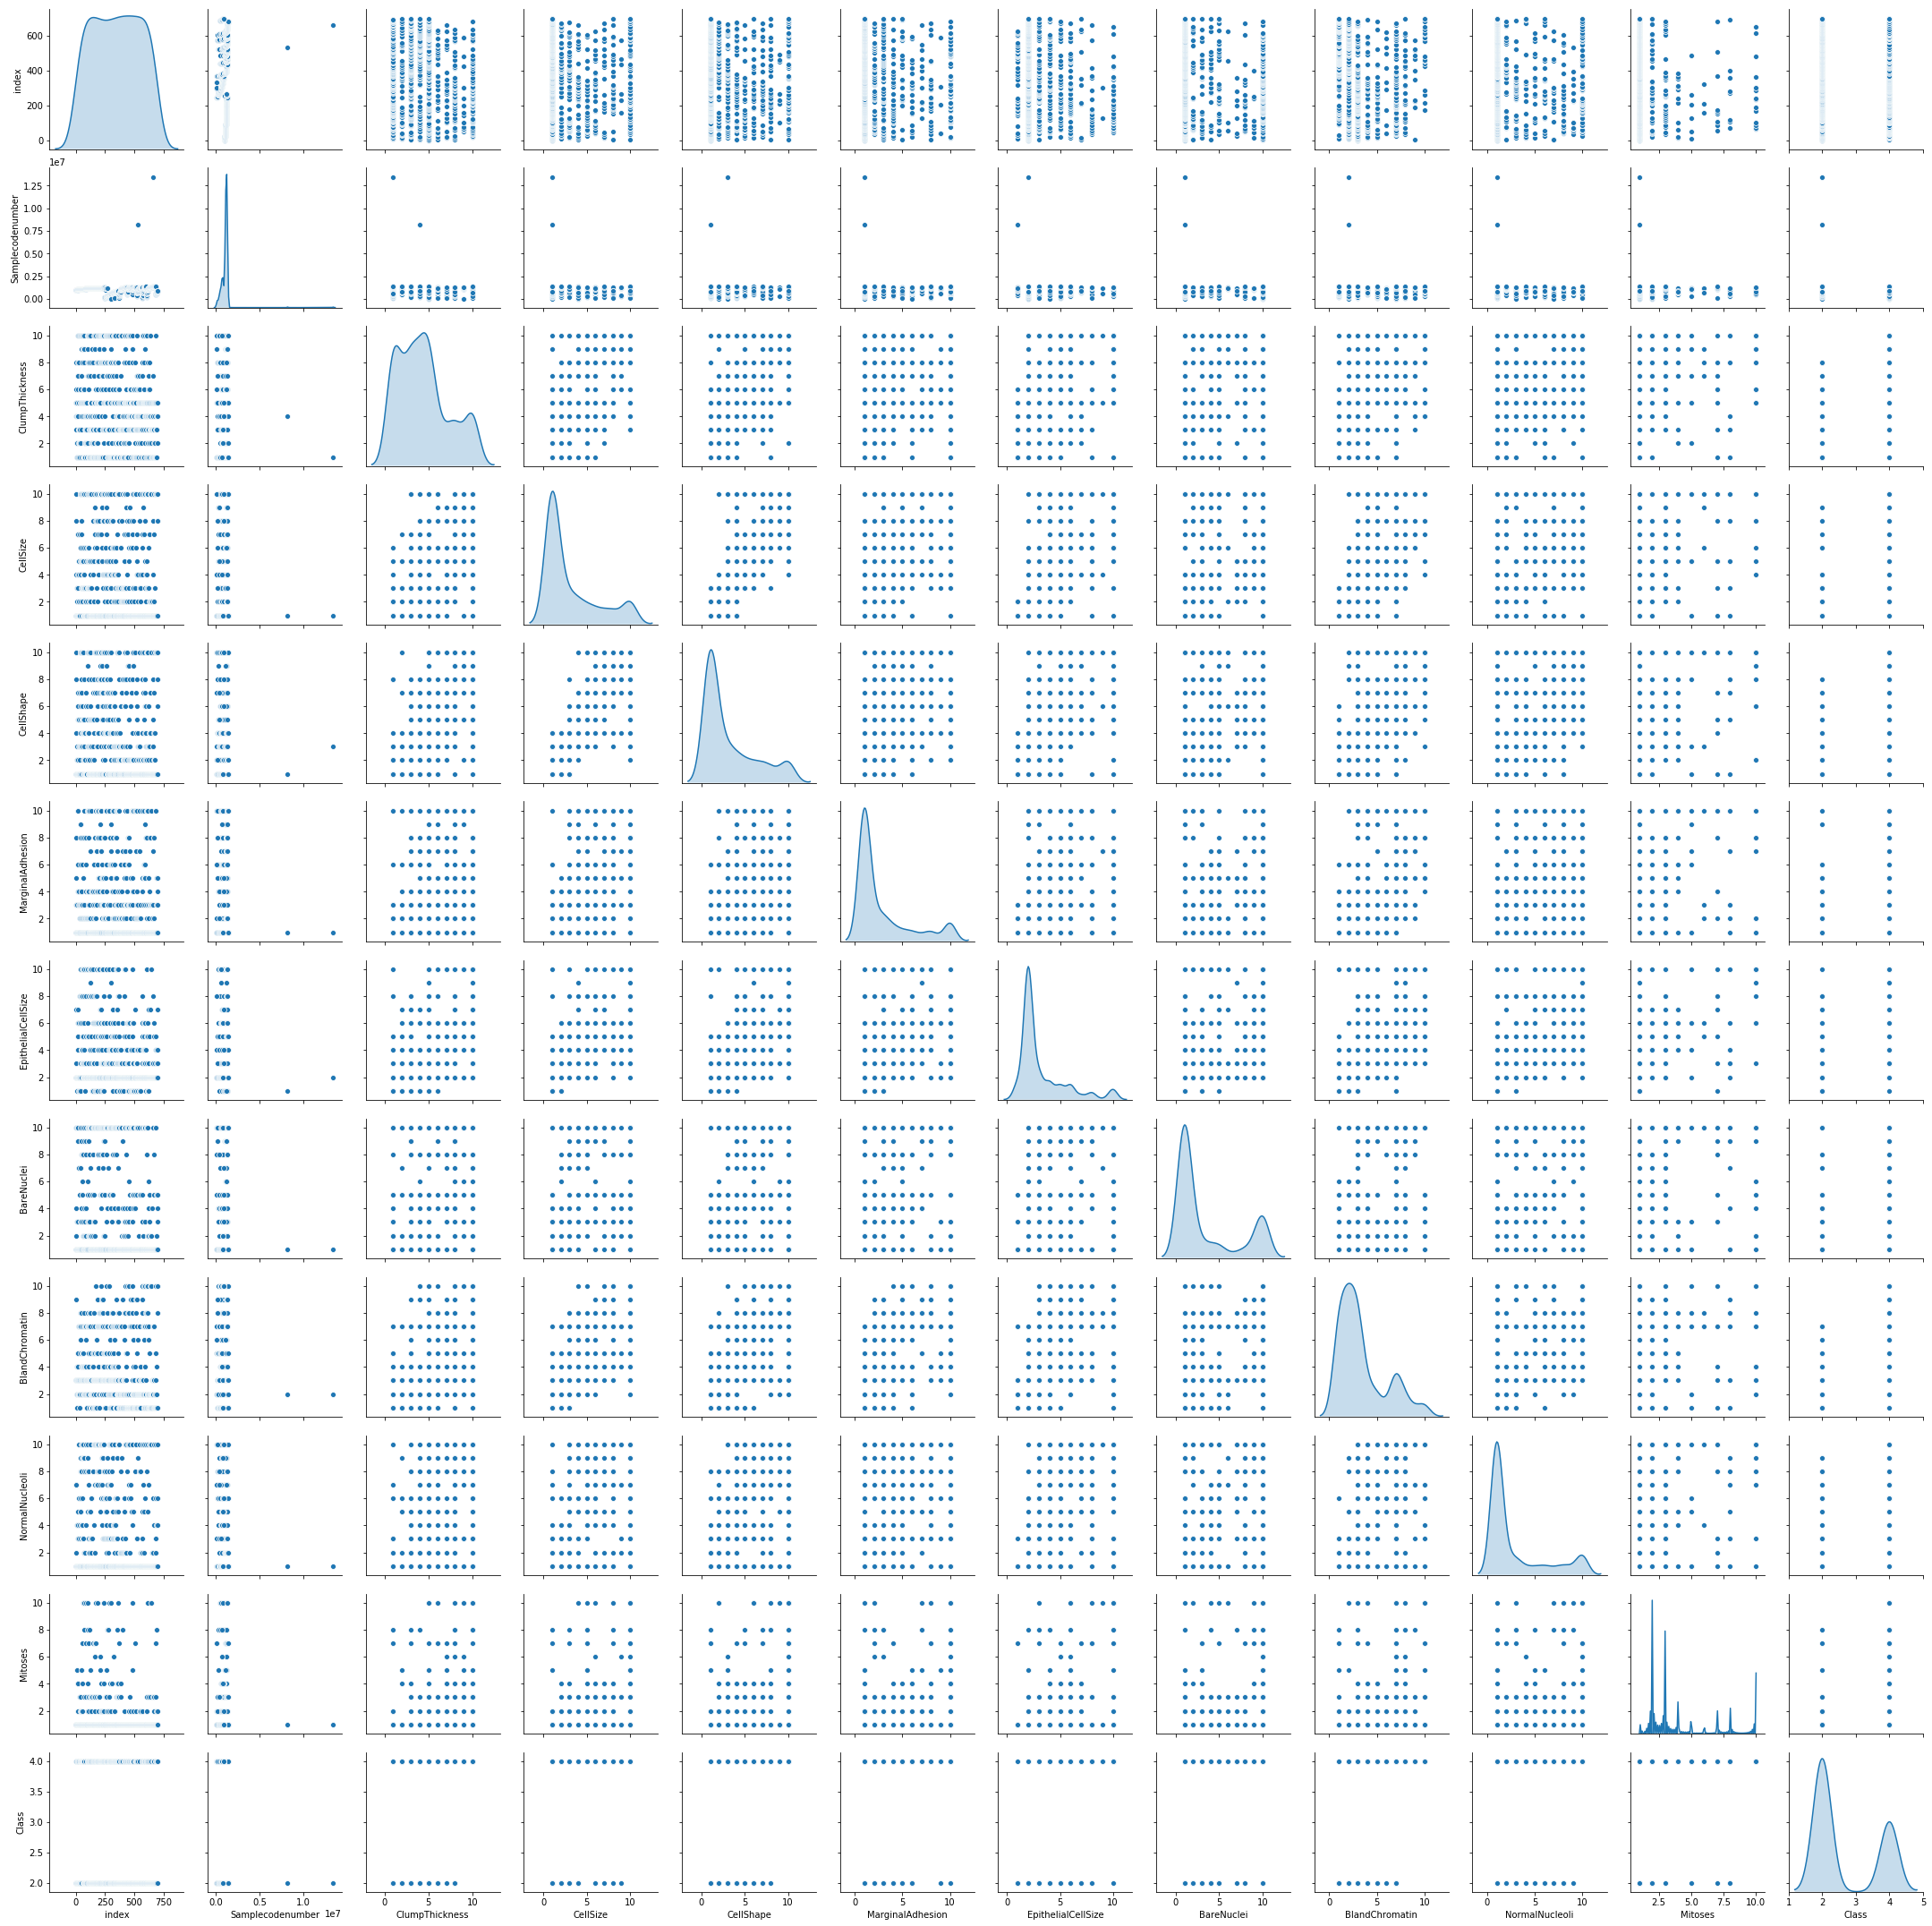

In [25]:
sns.pairplot(breast_cancer_DF, diag_kind="kde" )

In [ ]:
# Check for correlation of variable

In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [1]:
#Let us check for pair plots

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [0]:
# We could see most of the outliers are now removed.

In [27]:
breast_cancer_DF_out=breast_cancer_DF.drop(["Class"], axis=1)

In [28]:
for Column in breast_cancer_DF_out:
    if breast_cancer_DF_out[Column].dtype != 'object':
        Variable= np.sort(breast_cancer_DF_out[Column])
        q1,q3=np.percentile(Variable,[25,75])
        IQR=q3 - q1 
        lower_bound= (q1-(1.5*IQR))
        upper_bound= (q3+(1.5*IQR))
        print(Column,': Lower Bound :',lower_bound,': Upper Bound :',upper_bound,'\n')
        breast_cancer_DF_re_out=breast_cancer_DF_out[(breast_cancer_DF_out[Column] >= lower_bound) & (breast_cancer_DF_out[Column] <= upper_bound)]

index : Lower Bound : -354.0 : Upper Bound : 1050.0 

Samplecodenumber : Lower Bound : 323717.0 : Upper Bound : 1787269.0 

ClumpThickness : Lower Bound : -4.0 : Upper Bound : 12.0 

CellSize : Lower Bound : -5.0 : Upper Bound : 11.0 

CellShape : Lower Bound : -5.0 : Upper Bound : 11.0 

MarginalAdhesion : Lower Bound : -3.5 : Upper Bound : 8.5 

EpithelialCellSize : Lower Bound : -1.0 : Upper Bound : 7.0 

BareNuclei : Lower Bound : -5.0 : Upper Bound : 11.0 

BlandChromatin : Lower Bound : -2.5 : Upper Bound : 9.5 

NormalNucleoli : Lower Bound : -3.5 : Upper Bound : 8.5 

Mitoses : Lower Bound : 1.0 : Upper Bound : 1.0 



In [29]:
breast_cancer_DF_re_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572 entries, 0 to 690
Data columns (total 11 columns):
index                 572 non-null int64
Samplecodenumber      572 non-null int64
ClumpThickness        572 non-null int64
CellSize              572 non-null int64
CellShape             572 non-null int64
MarginalAdhesion      572 non-null int64
EpithelialCellSize    572 non-null int64
BareNuclei            572 non-null float64
BlandChromatin        572 non-null int64
NormalNucleoli        572 non-null int64
Mitoses               572 non-null int64
dtypes: float64(1), int64(10)
memory usage: 53.6 KB


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


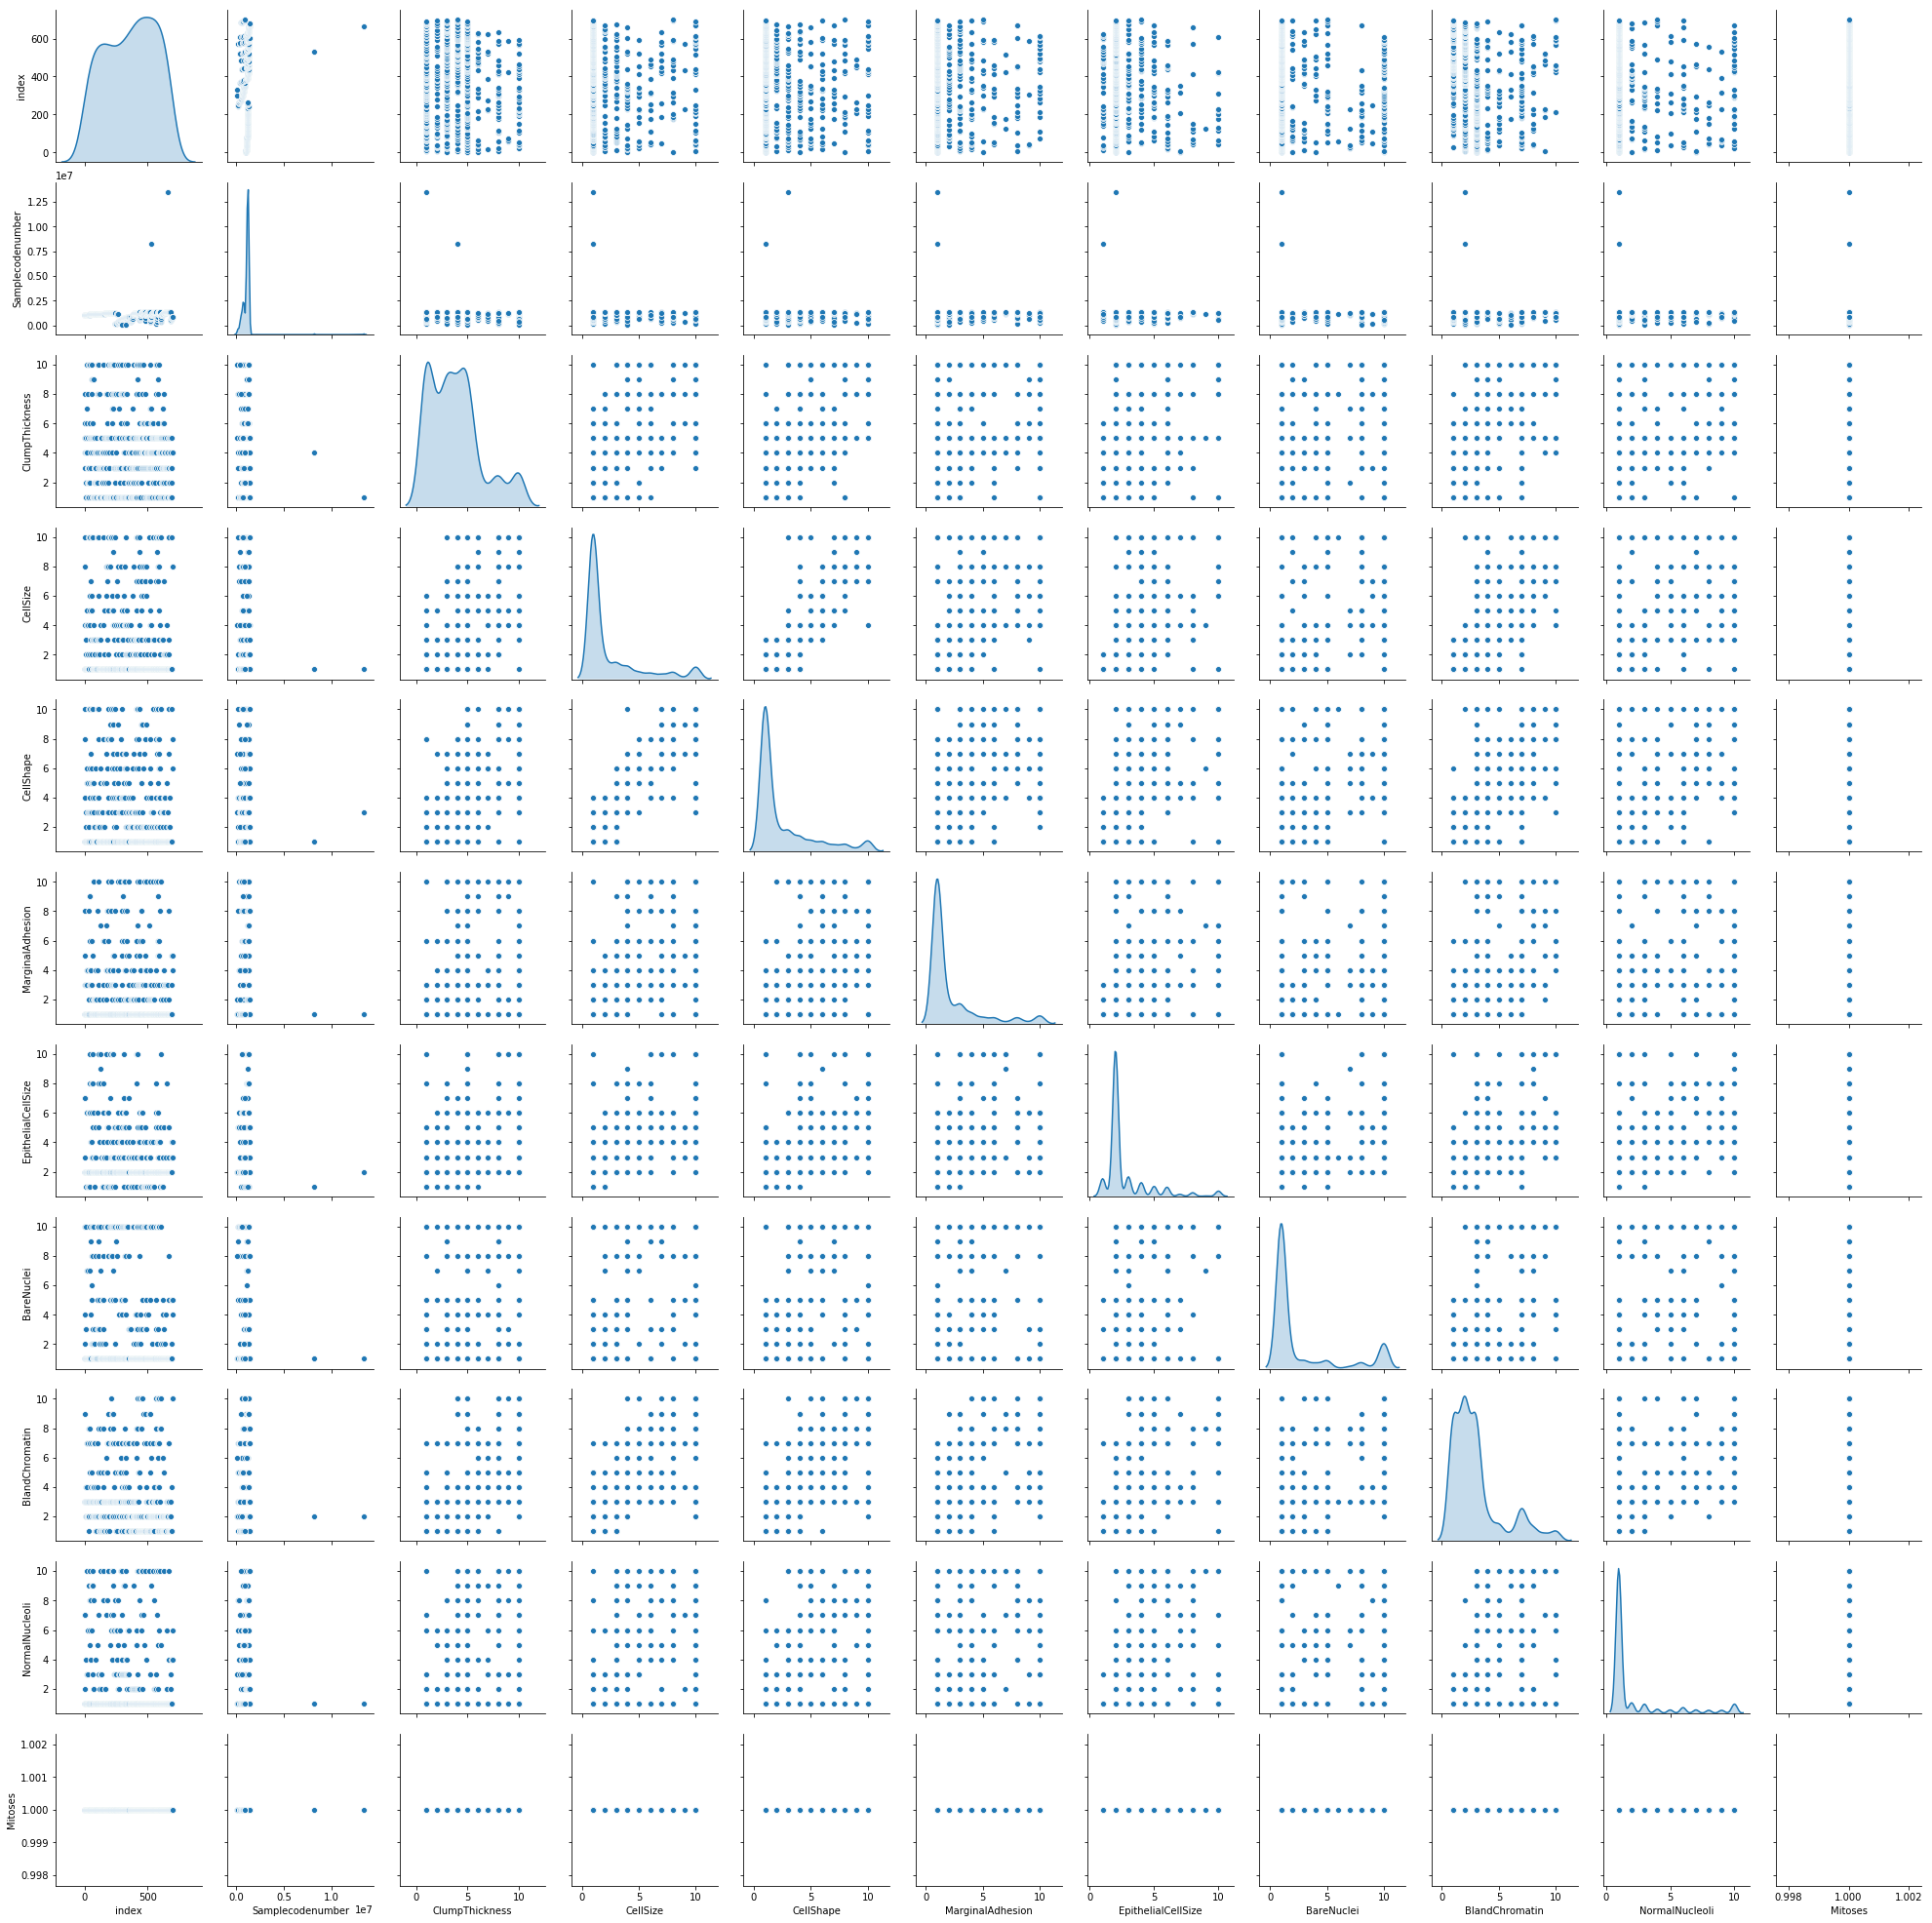

In [30]:
sns.pairplot(breast_cancer_DF_re_out, diag_kind="kde" )

In [31]:
from sklearn.model_selection import train_test_split


X,y = breast_cancer_DF_re_out.iloc[:, 1:].values , breast_cancer_DF_re_out.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5 , random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


X_train_std = sc.fit_transform(X_train)  
X_test_std = sc.fit_transform(X_test)

# Q6 Create a covariance matrix for identifying Principal components

In [2]:
# PCA
# Step 1 - Create covariance matrix


In [32]:
cov_matrix = np.cov(X_train_std.T)

print('Covariance Matrix \n%s', cov_matrix)# PCA
# Step 1 - Create covariance matrix


Covariance Matrix 
%s [[ 1.00350877 -0.0567137  -0.04568746 -0.0187868  -0.05473605 -0.04925211
  -0.05960959 -0.04937288 -0.05104585  0.        ]
 [-0.0567137   1.00350877  0.59313133  0.5777088   0.51094666  0.46831463
   0.54820898  0.52838464  0.45949806  0.        ]
 [-0.04568746  0.59313133  1.00350877  0.92272361  0.73366551  0.65241376
   0.72591273  0.76935863  0.66422429  0.        ]
 [-0.0187868   0.5777088   0.92272361  1.00350877  0.70690201  0.63652855
   0.73517893  0.76626603  0.69008466  0.        ]
 [-0.05473605  0.51094666  0.73366551  0.70690201  1.00350877  0.63241399
   0.68536187  0.61906881  0.58052548  0.        ]
 [-0.04925211  0.46831463  0.65241376  0.63652855  0.63241399  1.00350877
   0.598108    0.58014537  0.54670946  0.        ]
 [-0.05960959  0.54820898  0.72591273  0.73517893  0.68536187  0.598108
   1.00350877  0.65436043  0.54100382  0.        ]
 [-0.04937288  0.52838464  0.76935863  0.76626603  0.61906881  0.58014537
   0.65436043  1.00350877  0.58

# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [33]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.99227719e-02  9.97305287e-01  2.04128827e-02  3.44492102e-02
  -2.00426269e-02 -2.95790109e-02 -3.53348105e-02  1.48096994e-02
   1.17837957e-02  0.00000000e+00]
 [ 2.98696900e-01 -2.89489150e-02 -2.02211903e-02  9.00705607e-01
   7.35617238e-02 -2.97233785e-01 -2.30211026e-02 -1.45351943e-02
  -6.13362971e-02  0.00000000e+00]
 [ 3.95897955e-01  2.89014740e-02  7.04042009e-01 -5.29501018e-02
   1.18592372e-01  2.17177845e-01  4.96679400e-01 -7.58570061e-02
  -1.73998767e-01  0.00000000e+00]
 [ 3.94136471e-01  5.85214825e-02 -7.02184144e-01 -7.97027150e-02
   1.89171609e-01  2.17650404e-01  5.02245126e-01 -6.37607761e-02
  -4.84085218e-02  0.00000000e+00]
 [ 3.55233834e-01 -5.69823174e-04 -6.40209514e-02 -1.27994385e-01
  -3.39724280e-01  2.79295983e-03 -2.46308898e-01  5.71434168e-01
  -5.92200883e-01  0.00000000e+00]
 [ 3.29968617e-01 -4.20639349e-04 -1.99540505e-02 -2.34080701e-01
  -5.75343378e-01 -5.21588636e-01  6.89880348e-02 -4.67285831e-01
   9.86837956e-

In [34]:
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


,0,1,2,3,4,5,6,7,8,9
0,5.474622,1.002229,0.077335,0.5787,0.495312,0.460301,0.261827,0.376911,0.304344,0.0


# Q8 Find variance and cumulative variance by each eigen vector

In [35]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 60.61644045  71.713377    78.12089178  83.60511128  88.70168202
  92.87493524  96.24470779  99.1437213  100.         100.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

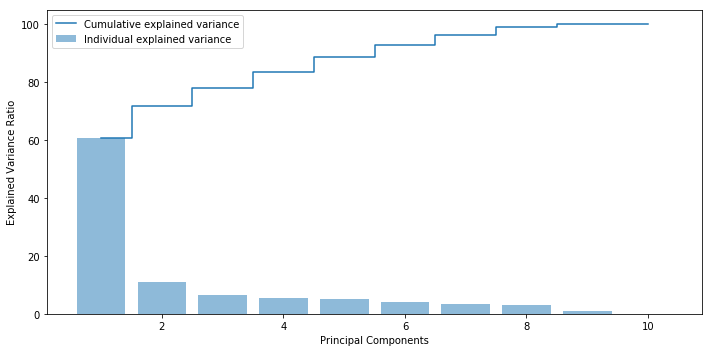

In [36]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [38]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eig_vals[index], eig_vecs[:,index]) for index in range(len(eig_vals))]


# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Note: always form pair of eigen vector and values  first before sorting...

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eig_vals))]



P_reduce = np.array(eigvectors_sort[0:10]).transpose()   # Selecting first few eigen vectors of all 14

Proj_train_data = np.dot(X_train_std,P_reduce)   # projecting training data onto the eight eigen vectors

Proj_test_data = np.dot(X_test_std,P_reduce)    # projecting test data onto the eight eigen vectors

In [39]:
# complete matrix operation 
print(y_train.shape)
X_train_std.shape, P_reduce.shape, Proj_train_data.shape

(286,)


((286, 10), (10, 10), (286, 10))

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(X_train_std)




PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [41]:
print(pca.explained_variance_ratio_)

[0.6061644  0.11096937 0.06407515 0.05484219 0.05096571 0.04173253]


In [42]:
print(pca.singular_values_)

[39.50021743 16.90074397 12.84248537 11.88123772 11.45363396 10.36433972]


In [43]:
principalComponents = pca.fit_transform(X_train_std)

In [44]:
X_train_std.shape

(286, 10)

# Q10 Find correlation between components and features

In [45]:
nComp = 2

mu = np.mean(X_train_std, axis=0)

Xhat = np.dot(pca.transform(X_train_std)[:,:nComp], pca.components_[:nComp,:])
Xhat += mu

print(Xhat[0,])

[ 0.04925172 -0.16210752 -0.21262682 -0.21069318 -0.19166698 -0.17803148
 -0.19267756 -0.19282436 -0.17639976  0.        ]


# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [46]:
jokes_df = pd.read_csv("jokes.csv",encoding = "ISO-8859-1")

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [47]:
jokes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24983 entries, 0 to 24982
Columns: 101 entries, NumJokes to Joke100
dtypes: float64(100), int64(1)
memory usage: 19.3 MB


In [48]:
jokes_df.shape

(24983, 101)

In [49]:
ratings=jokes_df.iloc[:200, 1:]

# Q22 Change the column indices from 0 to 99

In [50]:
columnsTitles = range(99)
ratings.reindex(columns=columnsTitles)

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
ratings

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [52]:
ratings.replace(99,0)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


ratings_diff = sc.fit_transform(ratings) 

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [54]:
(pd.DataFrame(ratings_diff)).describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,...,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,-4.940492e-17,-6.217249e-17,-6.106227e-17,2.536860e-16,-8.881784e-18,-8.881784e-18,-1.665335e-18,2.331468e-17,-9.492407e-17,9.992007e-18,...,1.004752e-16,-3.208545e-16,-1.054712e-16,1.676437e-16,2.331468e-17,2.342571e-16,1.476597e-16,5.218048e-17,-3.230749e-16,-1.099121e-16
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,...,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,-8.759899e-01,-7.501436e-01,-9.437414e-01,-1.098013e+00,-1.802882e+00,-9.141098e-01,-1.803067e+00,-2.013555e+00,-1.049636e+00,-7.309486e-01,...,-1.658589e+00,-1.558774e+00,-1.563594e+00,-1.526166e+00,-1.588814e+00,-1.573155e+00,-1.467113e+00,-1.617726e+00,-1.471138e+00,-1.646929e+00
25%,-6.792838e-01,-5.589615e-01,-7.536606e-01,-9.370799e-01,-7.715675e-01,-6.797115e-01,-8.286289e-01,-8.629168e-01,-8.579045e-01,-5.099649e-01,...,-1.342896e+00,-1.263064e+00,-1.232780e+00,-1.213036e+00,-1.258189e+00,-1.292244e+00,-1.188586e+00,-1.274176e+00,-1.213045e+00,-1.306238e+00
50%,-5.666345e-01,-4.083292e-01,-6.283332e-01,-7.433621e-01,6.971984e-02,-5.701168e-01,1.208696e-01,1.578107e-01,-7.223816e-01,-3.866443e-01,...,7.004889e-01,7.402239e-01,7.731714e-01,7.726257e-01,7.401242e-01,7.404417e-01,8.063022e-01,7.077818e-01,7.894014e-01,7.080765e-01
75%,1.538226e+00,-2.754375e-01,1.356697e+00,1.069553e+00,7.878582e-01,1.520457e+00,8.040453e-01,7.238505e-01,1.171165e+00,-2.375976e-01,...,7.004889e-01,7.402239e-01,7.731714e-01,7.726257e-01,7.401242e-01,7.404417e-01,8.063022e-01,7.077818e-01,7.894014e-01,7.080765e-01
max,1.538226e+00,2.081847e+00,1.356697e+00,1.069553e+00,1.708016e+00,1.520457e+00,1.620828e+00,1.929134e+00,1.171165e+00,2.269575e+00,...,7.004889e-01,7.402239e-01,7.731714e-01,7.726257e-01,7.401242e-01,7.404417e-01,8.063022e-01,7.077818e-01,7.894014e-01,7.080765e-01


In [56]:
mean_df =(pd.DataFrame(ratings_diff)).mean()

In [57]:
df =pd.DataFrame(data=mean_df)
df

,0
0,-4.940492e-17
1,-6.217249e-17
2,-6.106227e-17
3,2.536860e-16
4,-8.881784e-18
5,-8.881784e-18
6,-1.665335e-18
7,2.331468e-17
8,-9.492407e-17
9,9.992007e-18


In [58]:
df.sort_values(by=0).head(10)

,0
89,-3.974598e-16
98,-3.230749e-16
91,-3.208545e-16
76,-3.030909e-16
79,-2.886580e-16
81,-1.598721e-16
99,-1.099121e-16
15,-1.065814e-16
92,-1.054712e-16
8,-9.492407e-17
